In [2]:
import pandas, numpy

import matplotlib.pyplot as plt
import pathlib 
import seaborn

from skops.io import load

pathlib.Path('pdf/supplemental').mkdir(exist_ok=True)

In [3]:
best_model = {}

for model in ['LR', 'NN', 'XB']:
    best_model[model] = load('models/'+model.lower()+'.skops', trusted=True)

X={}
Y={}
Z={}

for i in ['mic']:
    X[i]={}
    Y[i]={}
    Z[i]={}
    with open('data/ds-'+i+'.npy', 'rb') as f:
        Y[i]['input'] = numpy.load(f)
        X[i]['input'] = numpy.load(f)
        Z[i]['input'] = numpy.load(f, allow_pickle=True)

In [4]:
mics = pandas.read_csv('data/ds-mic-phen.csv')
mics.MIC.value_counts().sort_index()

MIC
0           1
0-25        2
100         2
200         2
200-300     1
300-400     1
600         1
600-800     2
75-100      2
800        18
>100       25
Name: count, dtype: int64

In [39]:
len(mics)

57

In [5]:
def assign_numerical_mic(row):
    if row.MIC=='>100':
        return(800)
    elif row.MIC=='75-100':
        return(100)
    elif row.MIC=='0-25':
        return(25)
    elif row.MIC=='600-800':
        return(800)
    elif row.MIC=='300-400':
        return(400)
    elif row.MIC=='200-300':
        return(300)
    else:
        return(int(row.MIC))
    
mics['numerical_mic'] = mics.apply(assign_numerical_mic, axis=1)



for model in ['LR', 'NN', 'XB']:

    def find_score(row):
        mask = Z['mic']['input']==row.MUTATION
        return(Yscores[mask][0])

    Ypred = best_model[model].predict(X['mic']['input'])
    Yscores = best_model[model].predict_proba(X['mic']['input'])[:,1]

    mics[model+'_score'] = mics.apply(find_score, axis=1)
    
mics[:3]

,MUTATION,CONSISTENT_PHENOTYPE,MIC,SOURCE,numerical_mic,LR_score,NN_score,XB_score
0,V7G,R,800,CDC,800,0.964066,0.999840,0.937280
1,D8N,R,800,CDC,800,0.746219,0.999969,0.899815
2,Q10R,R,800,CDC,800,0.890390,0.999997,0.898772


/Users/fowler/Library/Python/3.11/lib/python/site-packages/seaborn/categorical.py:3544: UserWarning: 71.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/fowler/Library/Python/3.11/lib/python/site-packages/seaborn/categorical.py:3544: UserWarning: 22.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/fowler/Library/Python/3.11/lib/python/site-packages/seaborn/categorical.py:3544: UserWarning: 26.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/fowler/Library/Python/3.11/lib/python/site-packages/seaborn/categorical.py:3544: UserWarning: 71.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/fowler/Library/Python/3.11/lib/py

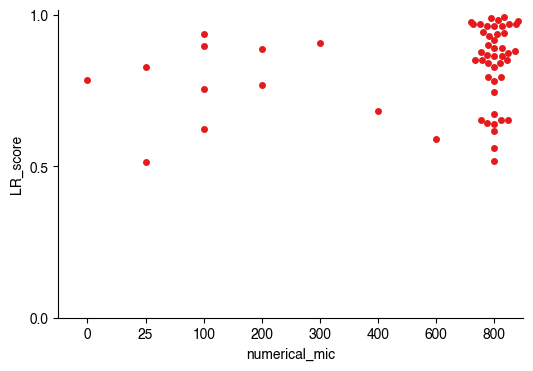

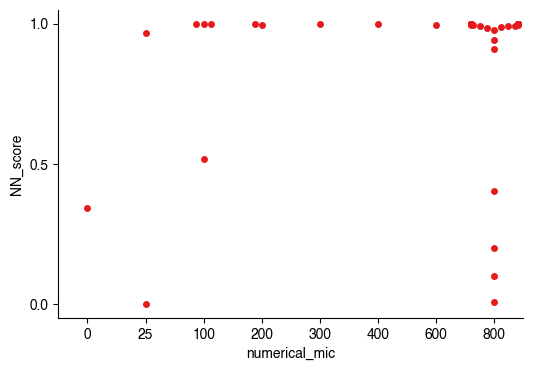

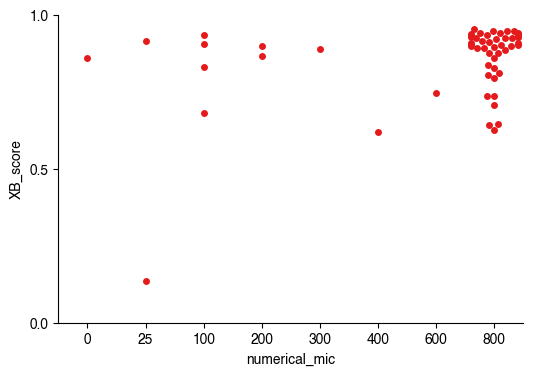

In [14]:
for model in ['LR', 'NN', 'XB']:

    fig = plt.figure(figsize=(6, 4))
    # axes.plot([100,100], [0,1], 'k--')
    axes = seaborn.swarmplot(data=mics,y=model+'_score',x='numerical_mic', size=5, color='#e41a1c')
    # axes.plot([-50,800], [0.5,0.5], 'k--')
    axes.spines['top'].set_visible(False)
    axes.spines['right'].set_visible(False)
    axes.set_yticks([0,0.5,1])
    # axes.plot([100,100], [0,1], 'k--')
    fig.savefig('pdf/supplemental/mic-swarm-'+model+'.pdf',bbox_inches='tight',transparent=True)

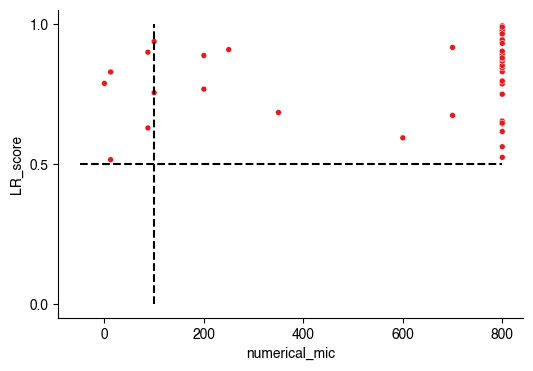

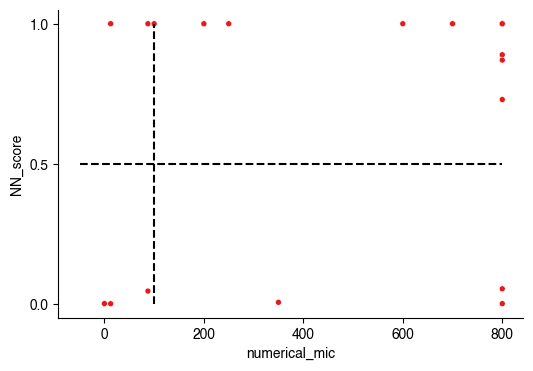

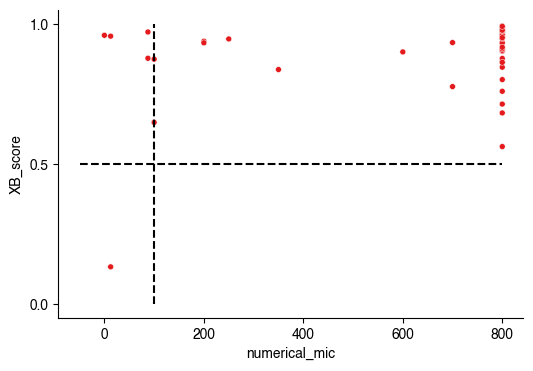

In [17]:
for model in ['LR', 'NN', 'XB']:
    fig = plt.figure(figsize=(6, 4))
    axes = seaborn.scatterplot(data=mics,y=model+'_score',x='numerical_mic', size=8, color='#e41a1c', legend=None)
    axes.plot([-50,800], [0.5,0.5], 'k--')
    axes.spines['top'].set_visible(False)
    axes.spines['right'].set_visible(False)
    axes.set_yticks([0,0.5,1])
    axes.plot([100,100], [0,1], 'k--')
    fig.savefig('pdf/supplemental/mic-scatter-'+model+'.pdf',bbox_inches='tight',transparent=True)

In [16]:
def predicted_phenotype(row):
    if row.XB_score > 0.5:
        return('R')
    else:
        return('S')
mics['PREDICTED_PHENOTYPE'] = mics.apply(predicted_phenotype, axis=1)
mics

,MUTATION,CONSISTENT_PHENOTYPE,MIC,SOURCE,numerical_mic,LR_score,NN_score,XB_score,PREDICTED_PHENOTYPE
0,V7G,R,800,CDC,800,0.964066,0.999840,0.937280,R
1,D8N,R,800,CDC,800,0.746219,0.999969,0.899815,R
2,Q10R,R,800,CDC,800,0.890390,0.999997,0.898772,R
3,Q10P,R,>100,EXIT-RIF,800,0.983044,0.999988,0.938899,R
4,F13C,S,75-100,EXIT-RIF,100,0.897202,0.516881,0.932819,R
5,C14R,R,>100,EXIT-RIF,800,0.936544,0.999985,0.891692,R
6,C14G,R,800,CDC,800,0.840594,0.999560,0.875272,R
7,L19P,R,800,CDC,800,0.970490,0.998565,0.926660,R
8,I31N,R,>100,EXIT-RIF,800,0.940004,0.999986,0.929238,R
9,I31S,R,>100,EXIT-RIF,800,0.881343,0.999998,0.896051,R


In [18]:
(mics.CONSISTENT_PHENOTYPE==mics.PREDICTED_PHENOTYPE).sum(), len(mics)

(51, 57)

In [32]:
muts_traintest = set(pandas.read_csv('data/ds-traintest-muts.csv', names=['mutation']).mutation)

muts_validation= set(pandas.read_csv('data/ds-validation-mutations-muts.csv', names=['mutation']).mutation)

muts_mic = set(mics.MUTATION)

In [36]:
muts_mic - (muts_traintest.union(muts_validation))

{'C72G'}

In [37]:
muts_mic - muts_traintest

{'C14G', 'C72G', 'D63A', 'F13C', 'L182S', 'T100P', 'V130A', 'W68S'}

In [38]:
mics[mics.CONSISTENT_PHENOTYPE!=mics.PREDICTED_PHENOTYPE]

,MUTATION,CONSISTENT_PHENOTYPE,MIC,SOURCE,numerical_mic,LR_score,NN_score,XB_score,PREDICTED_PHENOTYPE
4,F13C,S,75-100,EXIT-RIF,100,0.897202,0.516881,0.932819,R
11,L35R,S,75-100,EXIT-RIF,100,0.621623,0.999691,0.679693,R
29,C72G,S,0,EXIT-RIF,0,0.785319,0.342120,0.860540,R
30,F81S,S,100,CDC,100,0.753762,0.999475,0.828671,R
40,V130A,S,0-25,EXIT-RIF,25,0.828470,0.968137,0.916123,R
48,R140P,S,100,CDC,100,0.936699,1.000000,0.906550,R


In [ ]:
# C72G and V130A